In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal
from matplotlib.colors import LogNorm

def convolve(img, fil) :
    """
    Given a convolved image and a filter, returns the 2d circular deconvolution.
    Arguments
    img: 2d numpy array of the convolved image of shape (R,C)
    fil: 2d numpy array of the filter of shape (R,C)
    Returns a 2d numpy array of shape (R,C) containing the 2d circular deconvolution.  The 
    returned value must be real (so return the real part if you do a complex calculation).
    """

    img_fft = np.fft.fft2(img)
    fil_fft = np.fft.fft2(fil)
    convolve_image = img_fft * fil_fft
    convolve_image = np.fft.ifft2(convolve_image)
    return convolve_image.real

## the below is convolve and deconvolve using fft (from my homework solutions)

In [2]:
def deconvolve(img, fil) :
    fil_dft = np.fft.fft2(fil)
    for i in range(fil_dft.shape[0]):
        for j in range(fil_dft.shape[1]):
            if fil_dft[i,j] == 0:
                fil_dft[i,j] = 0.0000005 # adding a very very small value instead of zero
                                         # to prevent Zero division error

    decon = np.fft.ifft2(np.fft.fft2(img) / fil_dft)
    return decon.real

# Blur kernels

## a)

## Gaussian kernel

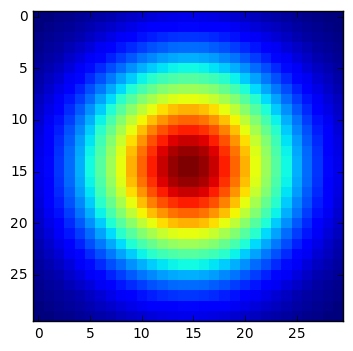

In [3]:
import scipy.ndimage.filters as fi
import scipy.stats as st

def gkern2(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""
    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

gau_ker = gkern2(30)
plt.imshow(gau_ker, interpolation='none')
plt.show()

# 1. Get noisy image

## a) function to convolve with blur kernel

In [4]:
import matplotlib.image as mpimg
import scipy.ndimage.filters as filter

def convolve_an_image(name, kernel):
    file = 'downloaded images/' + name + '.jpg'
    image=mpimg.imread(file)[:,:,0] #extracting just one component
    new_image = filter.convolve(image, kernel, mode="constant")
    return new_image

## b) display blurred image

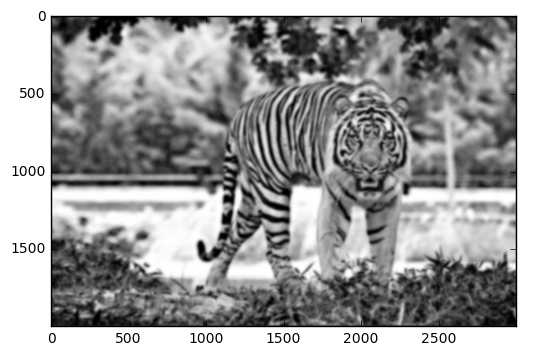

In [6]:
name = 'tiger'
blur_im = convolve_an_image(name, gau_ker)
plt.imshow(blur_im,cmap=plt.cm.gray)
plt.show()

## c) Convert to RGB image

In [17]:
from PIL import Image

i = Image.fromarray(blur_im)
rgbimg = i.convert('RGB')

## d) save the image 

In [18]:
directory_to_save = '../deblur_code_1_2/images/' + name + '.jpg'
rgbimg.save(directory_to_save)

# 2. Plot original image

In [ ]:
square_image = image[0:, 1000:3000]
print(square_image.shape)
plt.imshow(square_image,cmap=plt.cm.gray)
plt.show()